In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [34]:
df = pd.read_csv('mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [35]:
print(df.isnull().sum())
print(df['Virus Present'].value_counts())

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64
Virus Present
0    200
1    200
Name: count, dtype: int64


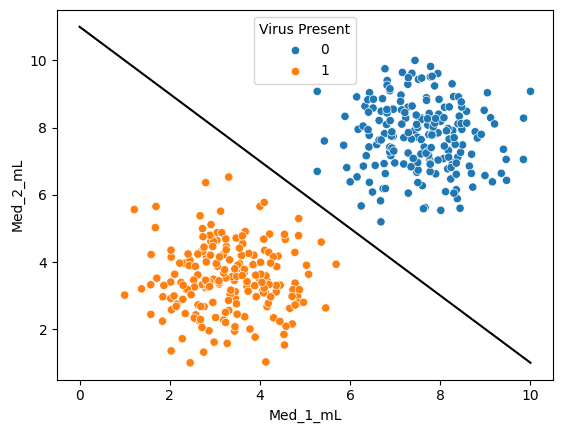

In [36]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', data=df, hue='Virus Present')

x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m*x + b

plt.plot(x, y, 'black')

In [39]:
from sklearn.svm import SVC

X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


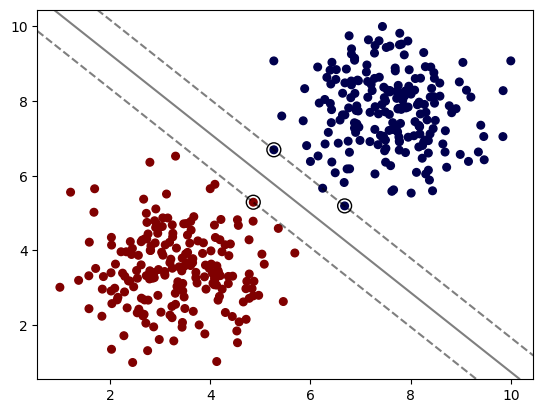

In [40]:
from svm_margin_plot import plot_svm_boundary # this func will plot that line for us 

plot_svm_boundary(model, X, y)

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


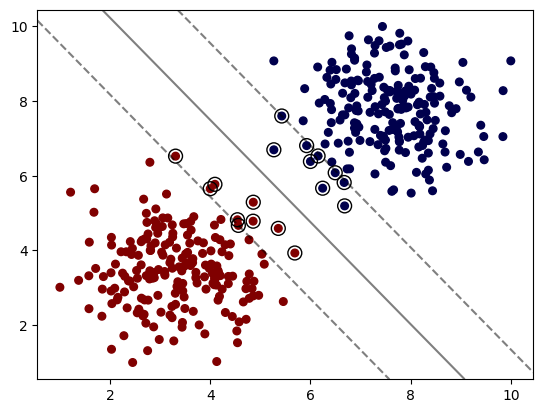

In [42]:
# what happends if we change C? # C is for defining soft margine
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)
plot_svm_boundary(model, X, y)

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


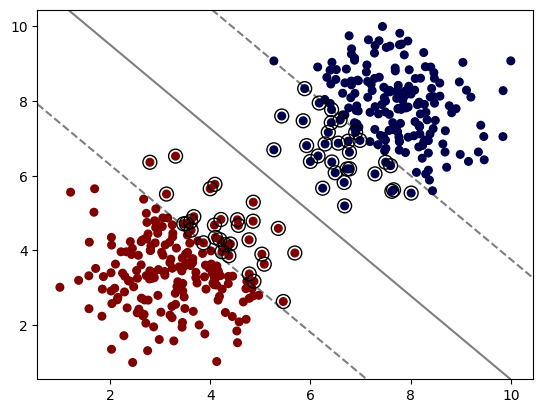

In [43]:
# what happends if we change C? # C is for defining soft margine
model = SVC(kernel='linear', C=0.005)
model.fit(X, y)
plot_svm_boundary(model, X, y)

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


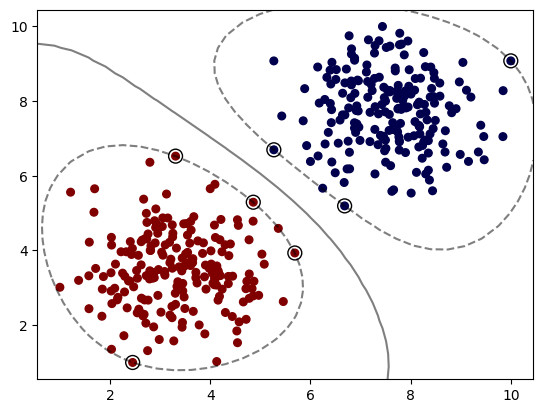

In [ ]:
# what happends if we change kernel?
# in rbf both the line and margin would be bent
model = SVC(kernel='rbf', C=1000)
model.fit(X, y)
plot_svm_boundary(model, X, y)

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


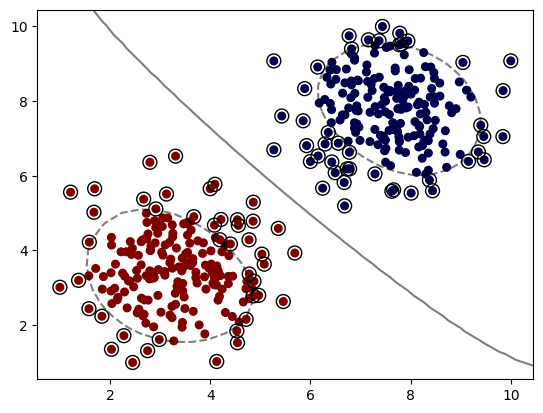

In [45]:
# what happends if we change kernel?
# in rbf both the line and margin would be bent
model = SVC(kernel='rbf', C=0.05)
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [ ]:
help(SVC)

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


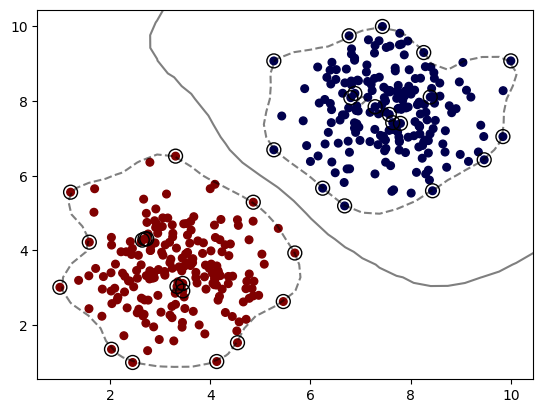

In [49]:
# gamma's default is scale. margins would be more compatible to datas
# if gamma value is not right our model will be overfitted
model = SVC(kernel='rbf', C=1000, gamma='auto')
model.fit(X, y)
plot_svm_boundary(model, X, y)

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


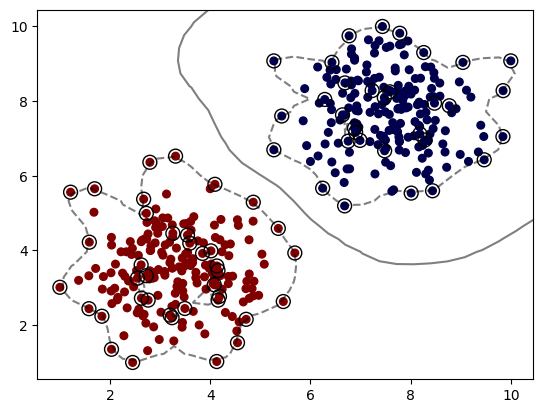

In [51]:
model = SVC(kernel='rbf', C=1000, gamma=0.9)
model.fit(X, y)
plot_svm_boundary(model, X, y)
# it has gotten worse

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


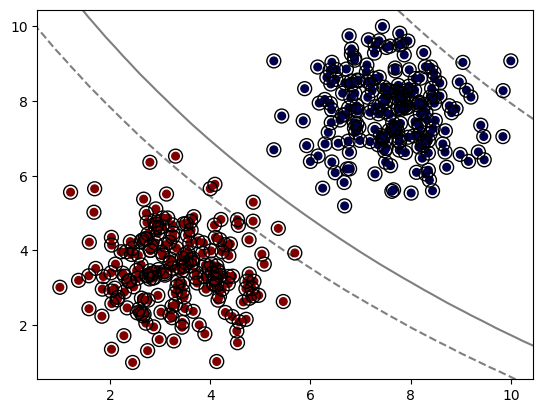

In [53]:
model = SVC(kernel='sigmoid', C=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)
# sigmoid is not useful in this case

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


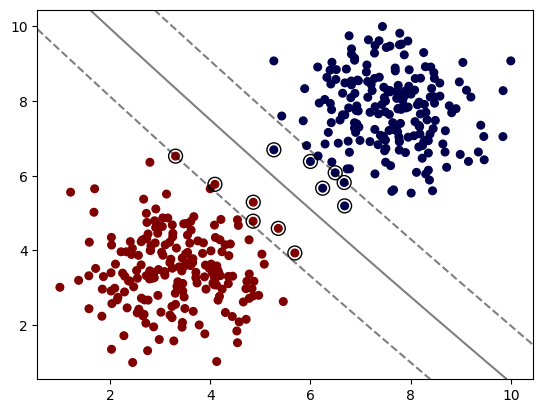

In [ ]:
model = SVC(kernel='poly', C=0.05, degree=2)
model.fit(X, y)
plot_svm_boundary(model, X, y)

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


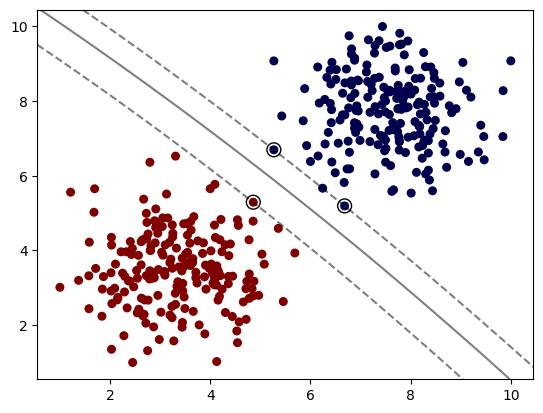

In [58]:
model = SVC(kernel='poly', C=0.05, degree=4)
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [62]:
# which to use?
# let's use Grid
from sklearn.model_selection import GridSearchCV
svc = SVC()
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

grid_model = GridSearchCV(svc, param_grid, cv=5)
grid_model.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [64]:
print(grid_model.best_estimator_.get_params)
print(grid_model.best_params_)

<bound method BaseEstimator.get_params of SVC(C=0.01, kernel='linear')>
{'C': 0.01, 'kernel': 'linear'}
